<a href="https://colab.research.google.com/github/jderazoa/algoritmodeprueba/blob/main/Taller_de_machine_learning_con_Pycaret_V1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Taller Machine Learning
Johan David Erazo Avila
Junio 2021**

El problema que se pretende resolver consiste en el pronostico del desempe ̃no de
los estudiantes que presentaron la prueba Saber Pro en el a ̃no 2019 en Bogota.
En otras palabras, a partir de las caracterısticas de los estudiantes se pretende
estimar su desempeño en la prueba.

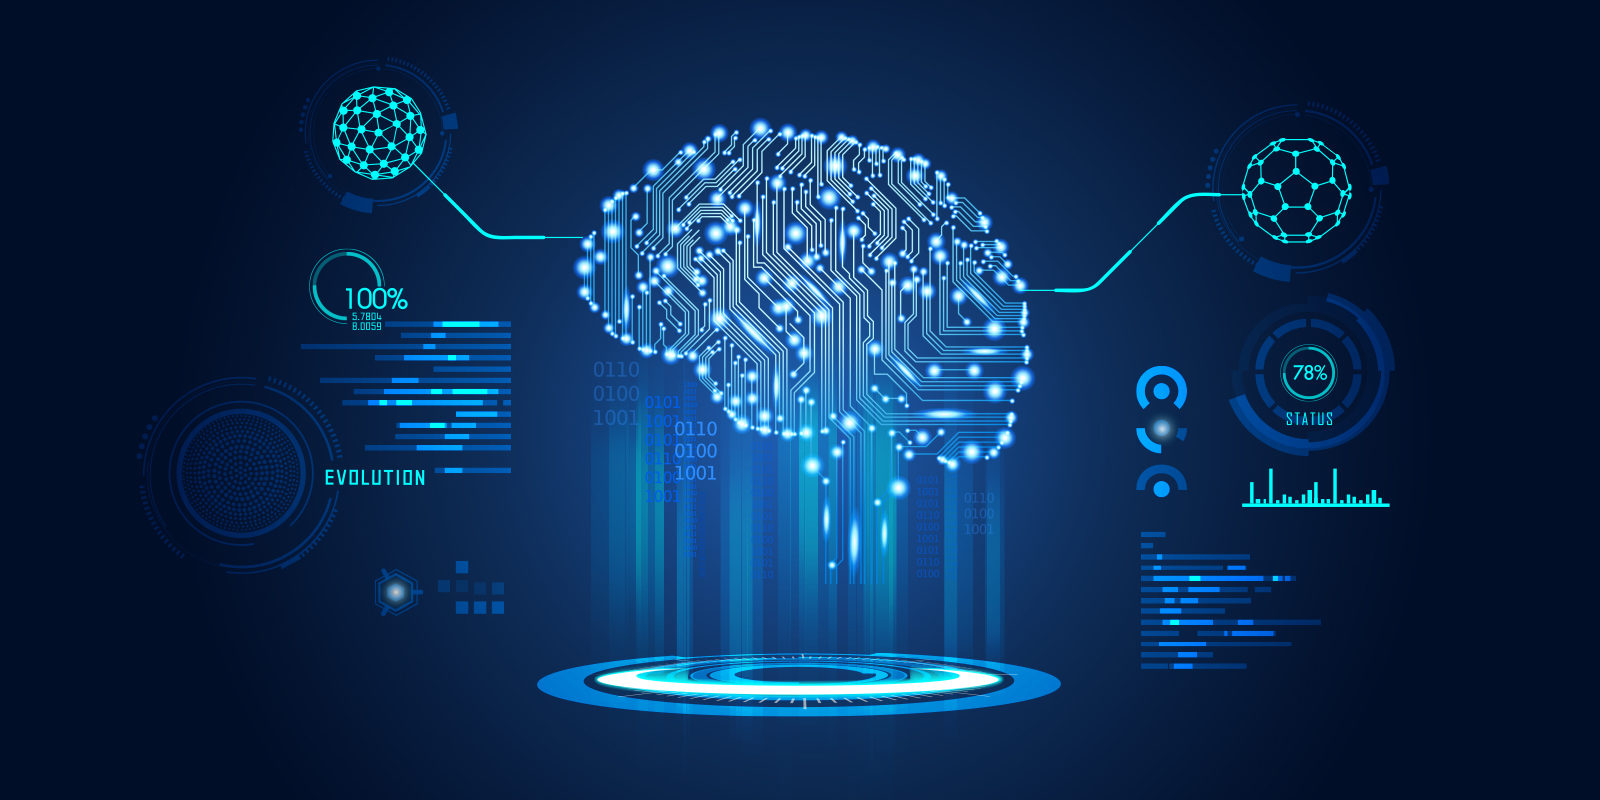

Se realizara el proceso de cargue de paquetes necesarios, el taller se realizara atraves de metodologia pycaret de codigo abierto

In [ ]:
!pip3 install pycaret #PyCaret automates machine learning model evaluations

In [ ]:
import os
import pandas as pd
from pycaret.regression import *

Descargando base de datos

In [ ]:
# 'https://drive.google.comu/c?id=1-8zVH3-KXEGLWSuxHKPyDcOnOYRRRgd2'
url = 'https://drive.google.com/uc?id=1-8zVH3-KXEGLWSuxHKPyDcOnOYRRRgd2'
df = pd.read_csv(url)
df

,Unnamed: 0,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DISC_FISICA,ESTU_DISC_SISTEM,ESTU_DISC_AUDITCASTELL,ESTU_DISC_AUDITLSC,ESTU_DISC_VISUALCEGUE,ESTU_DISC_VISUALBAJA,ESTU_DISC_VOZHABLA,ESTU_DISC_INTELEC,ESTU_DISC_SORDOCEGUERA,ESTU_DISC_PSICOSOCIAL,ESTU_DISC_ASPERGER,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_AREARESIDE,ESTU_COLE_TERMINO,ESTU_OTROCOLE_TERMINO,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_COMOCAPACITOEXAMENSB11,ESTU_CURSODOCENTESIES,ESTU_CURSOIESAPOYOEXTERNO,ESTU_CURSOIESEXTERNA,ESTU_SIMULACROTIPOICFES,ESTU_ACTIVIDADREFUERZOAREAS,ESTU_ACTIVIDADREFUERZOGENERIC,ESTU_TIPODOCUMENTOSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENESERVICIOTV,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_CUANTOSCOMPARTEBAÑO,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_SNIES_PRGMACADEMICO,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITAT_DESEM,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PNBC,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_DESEM,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_DESEM,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_INGLES_PNBC,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,0,CE,ARGENTINA,M,07/01/1985,SI,20194,EK201940000398,ESTUDIANTE,ARGENTINA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOGOTÁ,11.0,BOGOTÁ D.C.,11001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Postgrado,Educación profesional incompleta,Estrato 4,Si,Si,Si,Si,Si,Si,No,No,5 o 6,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Entre 11 y 20 horas,1701,PONTIFICIA UNIVERSIDAD JAVERIANA-BOGOTÁ D.C.,TEOLOGIA,957,11001,BOGOTÁ D.C.,BOGOTÁ,UNIVERSITARIO,PRESENCIAL,"FILOSOFÍA, TEOLOGÍA Y AFINES",11001,BOGOTÁ D.C.,BOGOTÁ,UNIVERSIDAD,NO OFICIAL - FUNDACIÓN,N,3,BUENOS AIRES,BUENOS AIRES,0,174,3,80.0,82.0,197,3,94.0,80.0,178,3,85.0,66.0,170.0,A2,74.0,61.0,NaN,NaN,NaN,NaN,144,34.0,48.0,69.618445,4.0,4,PUBLICAR
1,1,CE,ARGENTINA,M,03/09/1985,NO,20195,EK201950117998,ESTUDIANTE,ARGENTINA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOGOTÁ,11.0,BOGOTÁ D.C.,11001.0,Cabecera Municipal,NaN,NaN,NaN,NaN,Entre 5.5 millones y menos de 7 millones,No,No,No,Si,Repasó por cuenta propia,NaN,NaN,NaN,NaN,NaN,NaN,CE,04,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Estrato 3,Si,Si,Si,Si,Si,Si,No,Si,5 o 6,Pensionado,"Trabaja en el hogar, no trabaja o estudia",0,1701,PONTIFICIA UNIVERSIDAD JAVERIANA-BOGOTÁ D.C.,TEOLOGIA,957,11001,BOGOTÁ D.C.,BOGOTÁ,UNIVERSITARIO,PRESENCIAL,"FILOSOFÍA, TEOLOGÍA Y AFINES",11001,BOGOTÁ D.C.,BOGOTÁ,UNIVERSIDAD,NO OFICIAL - FUNDACIÓN,N,11001,BOGOTÁ D.C.,BOGOTÁ,11,201,3,96.0,96.0,221,4,100.0,97.0,204,4,98.0,92.0,177.0,B1,79.0,69.0,112.0,1.0,9.0,8.0,183,82.0,93.0,65.500365,4.0,4,PUBLICAR
2,2,CE,ARGENTINA,M,16/11/1995,NO,20195,EK201950108767,ESTUDIANTE,ARGENTINA,NaN,NaN,NaN,NaN,NaN,NaN

veamos las variables que tiene la base de datos

In [ ]:
list(df.columns)

vamos a separar la base de datos en 70% para la base de entrenamiento y 30% para la base de validacion

In [ ]:
import numpy as np

p_train = 0.70 # Porcentaje de train.

df['is_train'] = np.random.uniform(0, 1, len(df)) <= p_train
train, test = df[df['is_train']==True], df[df['is_train']==False]
df = df.drop('is_train', 1)

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  73830
Ejemplos usados para test:  31404


Tome una sola variable de salida, esta puede ser seleccionada de
cualquiera de aquellas que comiencen con: MOD, PUNT o PERCENTIL.

Tome como variables de entrada (predictivas) m ́aximo diez que
comiencen con: ESTU, FAMI o INST.
Nota 1: Se recomienda m ́aximo diez variables para que la actividad no se
extienda m ́as de la cuenta, sin embargo, puede tomar las que considere
necesarias (incluso todas o solo una).

Nota 2: No utilice como variables de entrada cualquiera que mida el de-
sempe ̃no del estudiante (dadas en el  ́ıtem anterior), porque en un caso

pr ́actico usted no dispondr ́a de estas antes de la prueba.

para el siguiente analisis se tomo como la variable objetivo o variables de respuesta "PUNT_GLOBAL", y como variables que pueden explicar el resultado fueron "ESTU_PAGOMATRICULACREDITO","ESTU_COMOCAPACITOEXAMENSB11","ESTU_SEMESTRECURSA","FAMI_ESTRATOVIVIENDA","FAMI_EDUCACIONPADRE", se tomaron estas variables ya que para mi considero que son representativas. el proceso se realizo para la base de entrenamiento y de validacion.

In [ ]:
dfTrain=train[["PUNT_GLOBAL","ESTU_PAGOMATRICULACREDITO","ESTU_COMOCAPACITOEXAMENSB11","ESTU_SEMESTRECURSA","FAMI_ESTRATOVIVIENDA","FAMI_EDUCACIONPADRE"]]

In [ ]:
dfTest=test[["PUNT_GLOBAL","ESTU_PAGOMATRICULACREDITO","ESTU_COMOCAPACITOEXAMENSB11","ESTU_SEMESTRECURSA","FAMI_ESTRATOVIVIENDA","FAMI_EDUCACIONPADRE"]]

Realice un an ́alisis descriptivo de las variables seleccionadas en el  ́ıtem
anterior. Se recomienda realizar este an ́alisis:
(a) realizando un an ́alisis individual de cada variable.
(b) confrontando cada variable de entrada con la de salida.
Nota: Este an ́alisis debe incluir posibles problemas por falta de simetr ́ıa,
datos at ́ıpicos o desbalance de clases, adem ́as escriba expl ́ıcitamente su
posible correcci ́on.

In [ ]:
pip install autoviz

In [ ]:
!pip install sweetviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [ ]:
dataframes=[dfTrain]
join=pd.concat(dataframes)
join.to_csv("analisisdfTrain.csv")

Shape of your Data Set: (73830, 7)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  4
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    7 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables


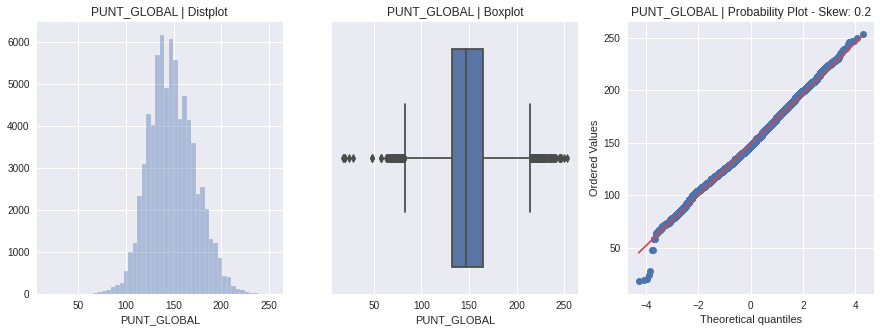

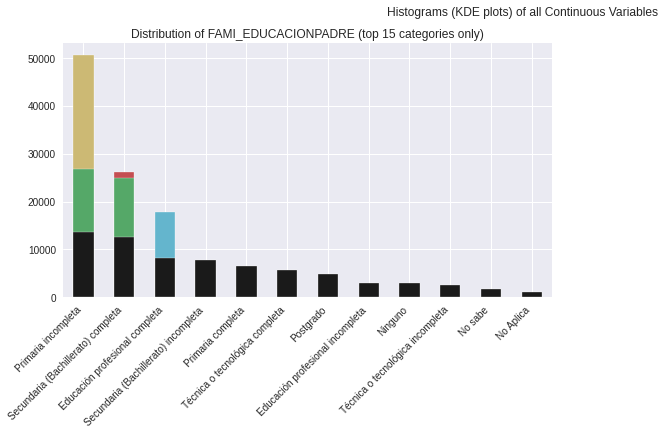

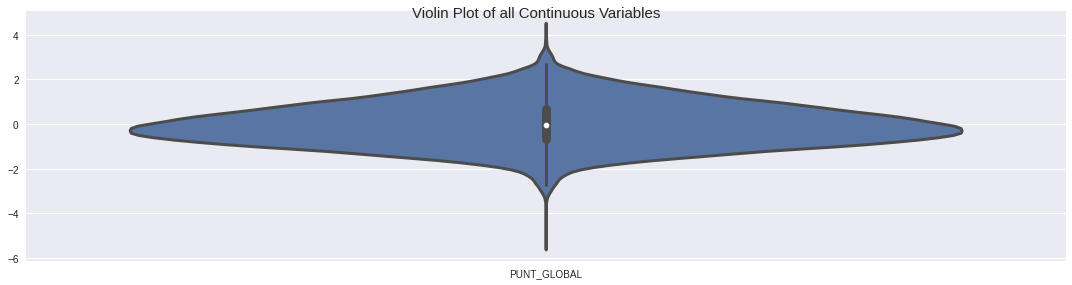

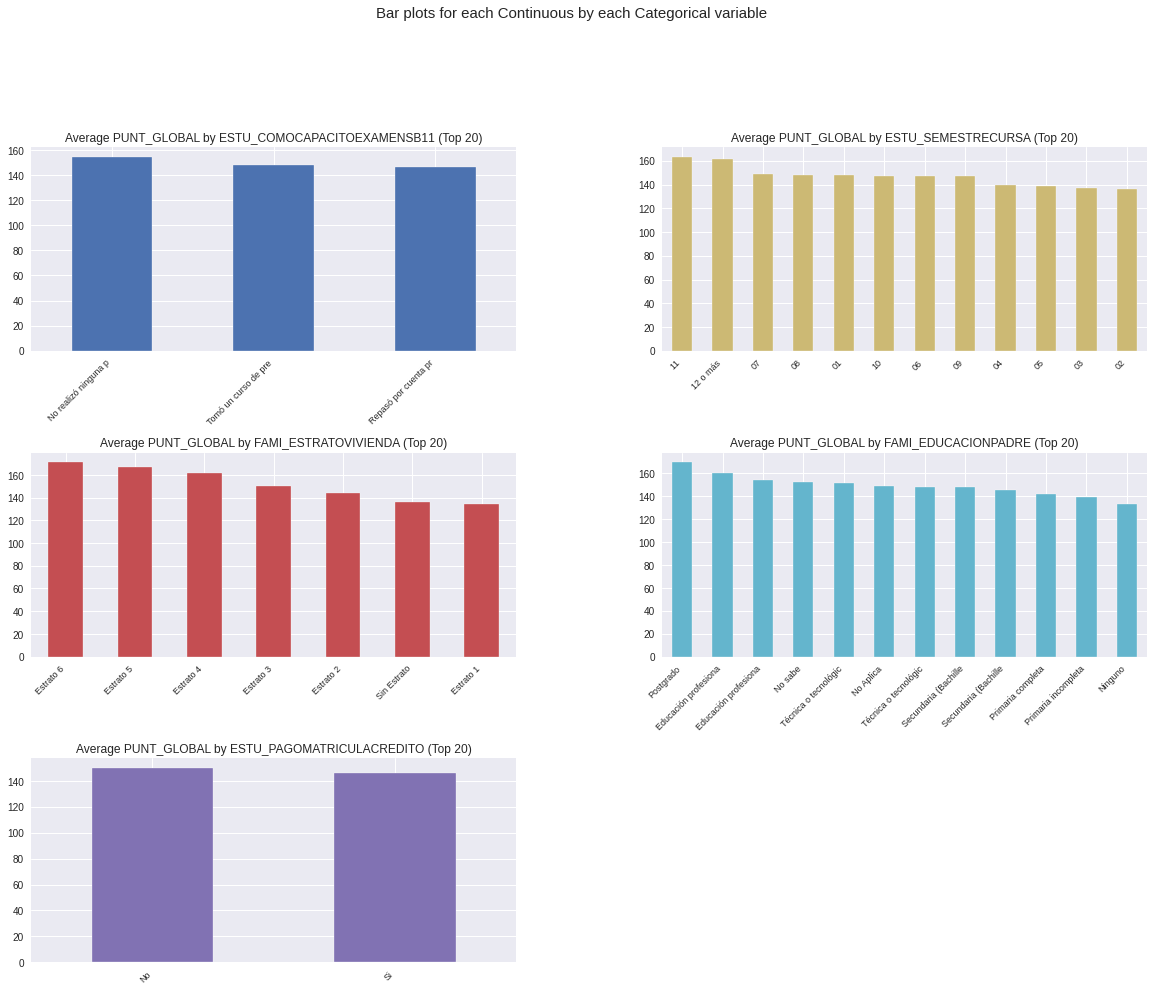

Time to run AutoViz (in seconds) = 3.325

 ###################### VISUALIZATION Completed ########################


In [ ]:
# 'https://drive.google.com/uc?id=1-8zVH3-KXEGLWSuxHKPyDcOnOYRRRgd2'
AV = AutoViz_Class()
filename ='/content/analisisdfTrain.csv'
sep = ","
dft = AV.AutoViz(
 filename,
   sep=",",
   depVar="",
   dfte=None,
   header=0,
   verbose=0,
   lowess=False,
   chart_format="svg",
   max_rows_analyzed=150000,
  max_cols_analyzed=30,
)

Es necesario remover partes atipicas del variable objeto de estudio en este caso el puntaje global

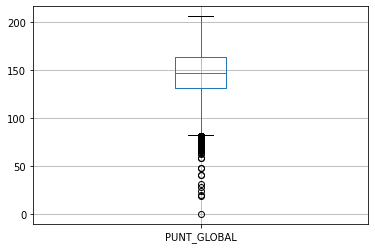

In [ ]:
# Removing outliers at 99 % but this filtering is just artificial
# q = dfTrain["PUNT_GLOBAL"].quantile(0.99)
# dfTrainInlier = dfTrain[dfTrain["PUNT_GLOBAL"] < q]
# boxplot = dfTrainInlier.boxplot(column=['PUNT_GLOBAL'])

Preprocesamiento: el objetivo es el PUNT_GLOBAL, los Datos originales fueron (72765 filas , y 6 columnas), en la base hay valores perdidos, las Características de las variables fueron categóricas, el Conjunto  de la base de entrenamiento fueron transformados (50935 filas, y 41 columnas) igualmente para el dato de prueba fueron transformados (21830 filas, 41 columnas)
se utilizo la imputación simple  y el Método de transformación de la variable objetivo fue por el metodo de box-cox





In [ ]:
exp_reg = setup(data = dfTrain, target = 'PUNT_GLOBAL', session_id=123)

,Description,Value
0,session_id,123
1,Target,PUNT_GLOBAL
2,Original Data,"(73830, 6)"
3,Missing Values,True
4,Numeric Features,0
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(51680, 41)"


Analizamos los modelo y tomamos para mejor interpretacion el dt	Decision Tree Regressor	que segun la definicion hace el siguiente trabajo
El árbol de decisiones (dt	Decision Tree Regressor) crea modelos de regresión o clasificación en forma de estructura de árbol. Divide un conjunto de datos en subconjuntos cada vez más pequeños mientras que, al mismo tiempo, se desarrolla de forma incremental un árbol de decisiones asociado. Los árboles de decisión pueden manejar datos tanto categóricos como numéricos.

https://www.saedsayad.com/decision_tree_reg.htm

In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,17.0939,463.3131,21.5232,0.2041,0.1487,0.1206,0.304
gbr,Gradient Boosting Regressor,17.1486,464.8963,21.5600,0.2014,0.1490,0.1210,2.991
br,Bayesian Ridge,17.2127,468.1726,21.6357,0.1958,0.1495,0.1214,0.136
ridge,Ridge Regression,17.2123,468.1898,21.6360,0.1958,0.1495,0.1214,0.037
lr,Linear Regression,17.2152,468.3288,21.6393,0.1955,0.1495,0.1214,0.295
huber,Huber Regressor,17.2011,468.5619,21.6446,0.1951,0.1495,0.1213,1.497
rf,Random Forest Regressor,17.4267,483.0505,21.9770,0.1702,0.1516,0.1228,8.398
et,Extra Trees Regressor,17.5688,493.6997,22.2175,0.1520,0.1535,0.1238,10.358
dt,Decision Tree Regressor,17.5804,494.6119,22.2381,0.1504,0.1536,0.1239,0.155
omp,Orthogonal Matching Pursuit,17.9102,504.5267,22.4601,0.1334,0.1547,0.1263,0.038


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Se realizara un analisis de las metricas para el objeto de estudio se evaluara apartir la metrica MAPE - Error medio de porcentaje absolutoa partir del modelo seleccionado, se selecciono este metodo porque nos entrega la desviación en términos porcentuales y no en unidades. 

In [ ]:
# tome el modelo Decision Tree Regressor
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17.8590,509.3904,22.5697,0.1455,0.1548,0.1256
1,17.3052,481.0583,21.9330,0.1480,0.1511,0.1217
2,17.5830,498.0385,22.3168,0.1321,0.1541,0.1243
3,17.2869,475.8419,21.8138,0.1627,0.1489,0.1207
4,17.4368,482.8754,21.9744,0.1672,0.1514,0.1223
5,17.7922,504.3642,22.4581,0.1434,0.1539,0.1250
6,17.9173,511.4121,22.6144,0.1381,0.1571,0.1268
7,17.6276,494.6078,22.2398,0.1755,0.1526,0.1239
8,17.6618,506.5895,22.5075,0.1478,0.1579,0.1252
9,17.3343,481.9410,21.9532,0.1435,0.1543,0.1230


Vamos aplicar la función tune_model () que se basa en una búsqueda de cuadrícula aleatoria de hiperparámetros en un espacio de búsqueda predefinido, para este objeto de estudio cambiamos el parámetro de optimización. a MAPE tune_model ('dt', optimizar = 'MAPE') he utilizado la métrica predeterminada R2 solo por motivos de simplicidad.  Las métricas utilizadas no son los únicos criterios que debe considerar al finalizar el mejor modelo para la producción. Por ahora solo se considero la máquina de aumento de gradiente de luz ajustada almacenada en la variable tuned_lightgbm como nuestro mejor modelo. LightGBM utiliza el algoritmo de crecimiento de árboles por hojas , mientras que muchas otras herramientas populares utilizan el crecimiento de árboles por profundidad. Comparado con el crecimiento en profundidad, el algoritmo en hoja puede converger mucho más rápido. Sin embargo, el crecimiento de las hojas puede estar sobreajustado si no se usa con los parámetros apropiados. https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

In [ ]:
params = {"max_depth": np.random.randint(1, (len(dfTrain.columns)*.85),20),
          "max_features": np.random.randint(1, len(dfTrain.columns),20)
          }
tuned_dt = tune_model(dt, optimize = 'MAPE', custom_grid = params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,18.7013,551.8504,23.4915,0.0743,0.1606,0.1313
1,18.1068,519.1330,22.7845,0.0806,0.1562,0.1274
2,18.3544,530.0011,23.0218,0.0764,0.1583,0.1296
3,18.2384,520.0348,22.8043,0.0849,0.1551,0.1272
4,18.3446,533.1468,23.0900,0.0805,0.1576,0.1285
5,18.6190,539.8931,23.2356,0.0831,0.1589,0.1308
6,18.7236,548.6958,23.4243,0.0753,0.1616,0.1322
7,18.6526,546.7277,23.3822,0.0886,0.1591,0.1307
8,18.6042,541.8998,23.2787,0.0884,0.1605,0.1317
9,18.1636,518.6702,22.7743,0.0782,0.1589,0.1288


Error de los residuos el modelo Decision Tree Regressor: Para el objeto de estudio se observa que los errores de los residuo son muy bajos 7.8% en la base de entrenamiento y 7.6% en la base de validacion, esto quiere decir que las variables de alguna forma tiene impacto significativo en el puntaje global del alumno

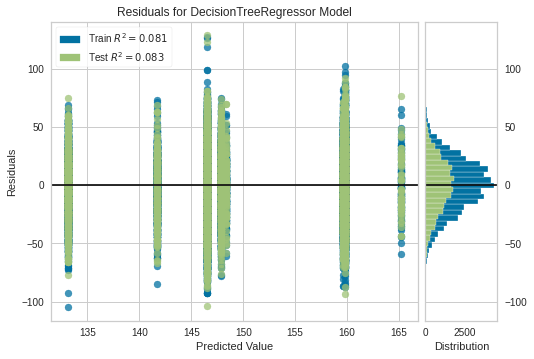

In [ ]:
plot_model(tuned_dt)

Lo errores estan alrrededor del 7.6% 

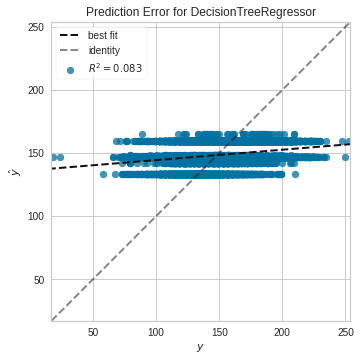

In [ ]:
plot_model(tuned_dt, plot = 'error')

En el siguiente grafico se observan las variables que mas tienen impacto, comenzando mayor a menor impacto tenemos las familias que viven en estrato 4 es la variable que mas responde con mas o menos el 25.5%  seguidamente de las familias que viven en estrato 1 con 25% compartiendo el nivel de impacto con la variable si el estudiante tomo capacitaciones, es interesante observar que la variable de la educacion del padre y que este no cuente con primaria impacta el resultado en un 12.5%, y finalmente el estracto nivel 2 impacta en el resultado en mas o meno 8%, cabe resaltar que la base inicialmente se dividia en una variable de estudio en este caso el puntaje global y 5 variables que explican el resultado, al momento del preprocesamiento este ultimo se codificaron generando una base de 43 columnas. 

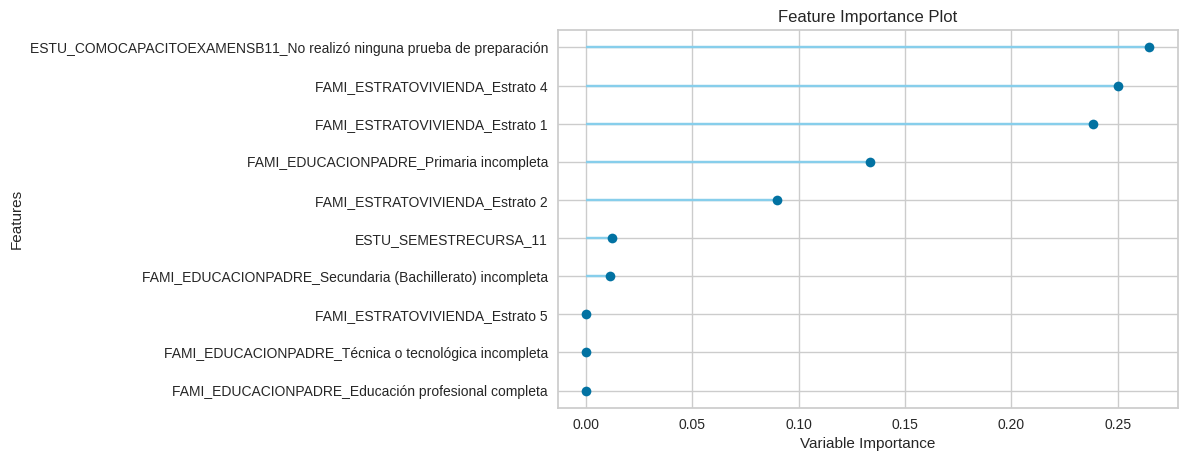

In [ ]:
plot_model(tuned_dt, plot='feature')

Finalmente el modelo obtenido es el siguiente con variables codificadas

In [ ]:
predict_model(tuned_dt)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,18.4662,536.8485,23.17,0.0834,0.1594,0.1301


,ESTU_PAGOMATRICULACREDITO_No,ESTU_PAGOMATRICULACREDITO_Si,ESTU_PAGOMATRICULACREDITO_not_available,ESTU_COMOCAPACITOEXAMENSB11_No realizó ninguna prueba de preparación,ESTU_COMOCAPACITOEXAMENSB11_Repasó por cuenta propia,ESTU_COMOCAPACITOEXAMENSB11_Tomó un curso de preparación,ESTU_COMOCAPACITOEXAMENSB11_not_available,ESTU_SEMESTRECURSA_01,ESTU_SEMESTRECURSA_02,ESTU_SEMESTRECURSA_03,ESTU_SEMESTRECURSA_04,ESTU_SEMESTRECURSA_05,ESTU_SEMESTRECURSA_06,ESTU_SEMESTRECURSA_07,ESTU_SEMESTRECURSA_08,ESTU_SEMESTRECURSA_09,ESTU_SEMESTRECURSA_10,ESTU_SEMESTRECURSA_11,ESTU_SEMESTRECURSA_12 o más,ESTU_SEMESTRECURSA_not_available,FAMI_ESTRATOVIVIENDA_Estrato 1,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato,FAMI_ESTRATOVIVIENDA_not_available,FAMI_EDUCACIONPADRE_Educación profesional completa,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_No Aplica,FAMI_EDUCACIONPADRE_No sabe,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,FAMI_EDUCACIONPADRE_Primaria incompleta,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE_Técnica o tecnológica completa,FAMI_EDUCACIONPADRE_Técnica o tecnológica incompleta,FAMI_EDUCACIONPADRE_not_available,PUNT_GLOBAL,Label
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,185.0,159.831327
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,154.0,146.516797
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,160.0,159.575722
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,160.0,146.516797
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,171.0,147.877904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,115.0,133.111634
22146,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,168.0,146.516797
22147,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,137.0,141.697898
22148,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,122.0,146.516797


In [ ]:
final_dt = finalize_model(tuned_dt)

In [ ]:
#Final model parameters for deployment
print(final_dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')


Mejorando el pronostico y se muestran ya finalmente la tabla con los pronosticos 

In [ ]:
predict_model(final_dt);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,18.4619,536.6277,23.1652,0.0838,0.1594,0.1301


In [ ]:
unseen_predictions = predict_model(final_dt, data=dfTest)
unseen_predictions.head()

,PUNT_GLOBAL,ESTU_PAGOMATRICULACREDITO,ESTU_COMOCAPACITOEXAMENSB11,ESTU_SEMESTRECURSA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,Label
0,144,NaN,NaN,NaN,Estrato 4,Postgrado,159.874429
1,183,No,Repasó por cuenta propia,04,Estrato 3,Secundaria (Bachillerato) completa,146.528238
4,144,Si,Repasó por cuenta propia,08,Estrato 4,Educación profesional completa,159.874429
13,104,No,No realizó ninguna prueba de preparación,09,Sin Estrato,Postgrado,159.989829
15,177,No,Repasó por cuenta propia,08,Estrato 6,Primaria completa,146.528238


In [ ]:
save_model(final_dt,'DTRegressorTunedModel')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='PUNT_GLOBAL', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                        max_depth=3, max_fe

In [ ]:
saved_final_dt = load_model('DTRegressorTunedModel')

Transformation Pipeline and Model Successfully Loaded


Guardar el pronostico

In [ ]:
new_prediction = predict_model(saved_final_dt, data=dfTest)
new_prediction.head()

,PUNT_GLOBAL,ESTU_PAGOMATRICULACREDITO,ESTU_COMOCAPACITOEXAMENSB11,ESTU_SEMESTRECURSA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,Label
0,144,NaN,NaN,NaN,Estrato 4,Postgrado,159.874429
1,183,No,Repasó por cuenta propia,04,Estrato 3,Secundaria (Bachillerato) completa,146.528238
4,144,Si,Repasó por cuenta propia,08,Estrato 4,Educación profesional completa,159.874429
13,104,No,No realizó ninguna prueba de preparación,09,Sin Estrato,Postgrado,159.989829
15,177,No,Repasó por cuenta propia,08,Estrato 6,Primaria completa,146.528238


Conclusiones:



---



Segun las variables seleccionadas en el anterior estudio, solo se profundizo en aquellas variables que tienen impacto mas no el desempeño, y  se puede determinar que las que mas impactan en la calidad del estudiante fueron el nivel economico, es interesante profundizar en el tema y determinar el desempeño a partir de esas variables. 

